# Problem Statement
> This project aims to predict delivery times for e-commerce orders based on a variety of factors such as product size, distance, traffic conditions, and shipping method. Using the provided dataset, learners will preprocess, analyze, and build regression models to accurately estimate delivery times. The final application will allow users to input relevant details and receive estimated delivery times via a user-friendly interface.

# Business Use Cases
## Enhanced Delivery Logistics:
* Predict delivery times to improve customer satisfaction and optimize delivery schedules.

## Dynamic Traffic and Weather Adjustments:
* Adjust delivery estimates based on current traffic and weather conditions.

## Agent Performance Evaluation:
* Evaluate agent efficiency and identify areas for training or improvement.

## Operational Efficiency:
* Optimize resource allocation for deliveries by analyzing trends and performance metrics.

# Approach

## 1. Data Preparation:
* Load and preprocess the dataset.
* Handle missing or inconsistent data.
* Perform feature engineering (e.g., calculating distance between store and drop locations).

## 2. Data Cleaning:
* Remove duplicates and handle missing values.
* Standardize categorical variables (e.g., weather, traffic).

## 3. Exploratory Data Analysis (EDA):
* Analyze trends in delivery times, agent performance, and external factors.
* Visualize the impact of traffic, weather, and other variables on delivery times.

## 4. Feature Engineering:
* Calculate geospatial distances using store and drop coordinates.
* Extract time-based features (e.g., hour of day, day of the week).

## 5. Regression Model Development:
* Train multiple regression models, including:
    * Linear Regression
    * Random Forest Regressor
    * Gradient Boosting Regressor
* Evaluate models using metrics like RMSE, MAE, and R-squared.
* Compare models and track performance metrics using MLflow.

## 6. Application Development:
* Build a user interface using Streamlit to:
    * Input order details (e.g., distance, traffic, weather, etc.).
    * Display predicted delivery times.
## 7. Model Comparison and Tracking:
* Use MLflow to log, compare, and manage different regression models.
* Document the hyperparameters, performance metrics, and model versions.

## 8. Deployment:
* Deploy the application in streamlit for accessibility and scalability.

## Dataset
* amazon_delivery.csv

## APPROACH:
### Data Preparation:
* Load and preprocess the dataset.
* Handle missing or inconsistent data.
* Perform feature engineering (e.g., calculating distance between store and drop locations).

### Data Cleaning:
* Remove duplicates and handle missing values.
* Standardize categorical variables (e.g., weather, traffic).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("amazon_delivery.csv")
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [3]:
df.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


In [4]:
df.shape

(43739, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [6]:
df.describe(include='object')

,Order_ID,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Category
count,43739,43739,43739,43739,43648,43739,43739,43739,43739
unique,43739,44,177,193,6,5,4,4,16
top,nsyz997960170,2022-03-15,21:55:00,21:30:00,Fog,Low,motorcycle,Metropolitian,Electronics
freq,1,1141,460,481,7440,14999,25527,32698,2849


In [7]:
df.isnull().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [8]:
# rows where Agent_Rating is missing
missing_rating = df[df['Agent_Rating'].isnull()]
missing_rating

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
124,uurs547552548,23,NaN,22.569358,88.433452,22.599358,88.463452,2022-02-17,23:25:00,23:35:00,Sunny,Low,motorcycle,Metropolitian,75,Snacks
1996,xoaj834389107,32,NaN,0.000000,0.000000,0.050000,0.050000,2022-02-11,20:50:00,21:00:00,Sandstorms,Jam,motorcycle,Urban,185,Snacks
2002,lasr795083832,23,NaN,25.454648,81.834502,25.584648,81.964502,2022-02-18,19:50:00,19:55:00,Windy,Jam,motorcycle,Metropolitian,150,Outdoors
2018,gjcr517387117,26,NaN,0.000000,0.000000,0.080000,0.080000,2022-02-16,23:50:00,23:55:00,Cloudy,Low,scooter,Metropolitian,140,Clothing
3253,ohgx024912559,32,NaN,19.874733,75.353942,19.984733,75.463942,2022-02-16,18:35:00,18:50:00,Sandstorms,Medium,motorcycle,Metropolitian,170,Kitchen
3385,tvng587700125,25,NaN,15.513150,73.783460,15.593150,73.863460,2022-02-18,17:40:00,17:55:00,Sunny,Medium,motorcycle,Urban,115,Clothing
4805,fctw514165232,37,NaN,0.000000,0.000000,0.060000,0.060000,2022-02-15,20:55:00,21:10:00,Cloudy,Jam,motorcycle,Metropolitian,125,Kitchen
6576,yseg007856175,21,NaN,23.264015,77.408236,23.334015,77.478236,2022-02-14,23:35:00,23:50:00,Cloudy,Low,scooter,Metropolitian,120,Kitchen
6580,rpgm542793380,24,NaN,30.372202,78.077151,30.452202,78.157151,2022-02-12,17:40:00,17:45:00,Windy,Medium,van,Metropolitian,110,Pet Supplies
7535,ilse030322540,22,NaN,15.576683,73.755750,15.586683,73.765750,2022-02-11,10:15:00,10:25:00,Stormy,Low,motorcycle,Urban,115,Sports


In [9]:
# rows where Weather is missing
missing_weather = df[df['Weather'].isnull()]
missing_weather

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
2286,xige084493792,15,1.0,-26.891191,75.802083,26.981191,75.892083,2022-03-12,NaN,17:20:00,NaN,NaN,motorcycle,Urban,75,Home
2779,oilg311747812,15,1.0,22.750040,75.902847,22.810040,75.962847,2022-04-03,NaN,20:30:00,NaN,NaN,scooter,Metropolitian,145,Kitchen
2825,pbox816153129,15,1.0,21.149569,72.772697,21.209569,72.832697,2022-03-21,NaN,22:10:00,NaN,NaN,bicycle,Metropolitian,100,Clothing
3438,nzsa056960624,50,6.0,-12.970324,-77.645748,13.010324,77.685748,2022-03-13,NaN,12:30:00,NaN,NaN,van,Urban,125,Cosmetics
4514,eids248121351,50,6.0,-17.451976,-78.385883,17.561976,78.495883,2022-04-04,NaN,23:20:00,NaN,NaN,bicycle,Metropolitian,135,Jewelry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40359,lasg907081524,50,6.0,22.751234,75.889490,22.781234,75.919490,2022-03-17,NaN,20:40:00,NaN,NaN,scooter,Metropolitian,140,Apparel
41088,wgdm794380305,50,6.0,-12.939496,77.625999,12.949496,77.635999,2022-03-19,NaN,09:40:00,NaN,NaN,van,Metropolitian,95,Books
42598,llox673359294,15,1.0,0.000000,0.000000,0.070000,0.070000,2022-03-14,NaN,17:40:00,NaN,NaN,scooter,Metropolitian,170,Jewelry
43053,ifig993965994,15,1.0,13.086438,80.220672,13.216439,80.350672,2022-03-18,NaN,18:00:00,NaN,NaN,van,Urban,130,Jewelry


In [10]:
# check rows where both agent_rating and weather are missing
both_missing = df[df[['Agent_Rating', 'Weather']].isnull().any(axis=1)]
both_missing

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
124,uurs547552548,23,NaN,22.569358,88.433452,22.599358,88.463452,2022-02-17,23:25:00,23:35:00,Sunny,Low,motorcycle,Metropolitian,75,Snacks
1996,xoaj834389107,32,NaN,0.000000,0.000000,0.050000,0.050000,2022-02-11,20:50:00,21:00:00,Sandstorms,Jam,motorcycle,Urban,185,Snacks
2002,lasr795083832,23,NaN,25.454648,81.834502,25.584648,81.964502,2022-02-18,19:50:00,19:55:00,Windy,Jam,motorcycle,Metropolitian,150,Outdoors
2018,gjcr517387117,26,NaN,0.000000,0.000000,0.080000,0.080000,2022-02-16,23:50:00,23:55:00,Cloudy,Low,scooter,Metropolitian,140,Clothing
2286,xige084493792,15,1.0,-26.891191,75.802083,26.981191,75.892083,2022-03-12,NaN,17:20:00,NaN,NaN,motorcycle,Urban,75,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41504,ogxf318978500,20,NaN,25.451517,81.832616,25.501517,81.882616,2022-02-13,22:15:00,22:30:00,Stormy,Low,scooter,Urban,85,Shoes
42598,llox673359294,15,1.0,0.000000,0.000000,0.070000,0.070000,2022-03-14,NaN,17:40:00,NaN,NaN,scooter,Metropolitian,170,Jewelry
43027,qhka163034669,20,NaN,22.514585,88.393310,22.594585,88.473310,2022-02-14,22:20:00,22:25:00,Fog,Low,scooter,Metropolitian,100,Electronics
43053,ifig993965994,15,1.0,13.086438,80.220672,13.216439,80.350672,2022-03-18,NaN,18:00:00,NaN,NaN,van,Urban,130,Jewelry


In [11]:
# Percentage of missing values
df.isnull().mean()*100

Order_ID           0.000000
Agent_Age          0.000000
Agent_Rating       0.123460
Store_Latitude     0.000000
Store_Longitude    0.000000
Drop_Latitude      0.000000
Drop_Longitude     0.000000
Order_Date         0.000000
Order_Time         0.000000
Pickup_Time        0.000000
Weather            0.208052
Traffic            0.000000
Vehicle            0.000000
Area               0.000000
Delivery_Time      0.000000
Category           0.000000
dtype: float64

In [12]:
df.columns

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category'],
      dtype='object')

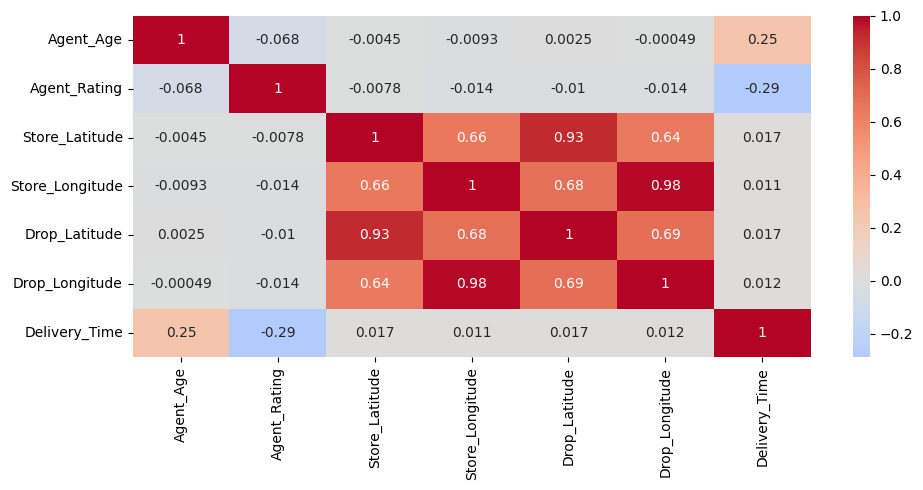

In [13]:
# delivery time relations
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.tight_layout()
plt.show()

In [14]:
# calculating distance using lat/lon:
def haversine(lat1, lon1, lat2, lon2):
    import numpy as np
    R = 6371
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2-lat1)
    dlambda = np.radians(lon2-lon1)
    a = np.sin(dphi/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(dlambda/2)**2
    return 2*R*np.arcsin(np.sqrt(a))

df['distance_km'] = haversine(df['Store_Latitude'], df['Store_Longitude'],
                              df['Drop_Latitude'], df['Drop_Longitude'])


In [15]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,distance_km
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.025149
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.552758
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.790401
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,6.210138


In [16]:
# dropping Order_ID column
df = df.drop(columns='Order_ID')

In [17]:
df.head()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,distance_km
0,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.025149
1,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530
2,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.552758
3,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.790401
4,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,6.210138


In [18]:
df.shape

(43739, 16)

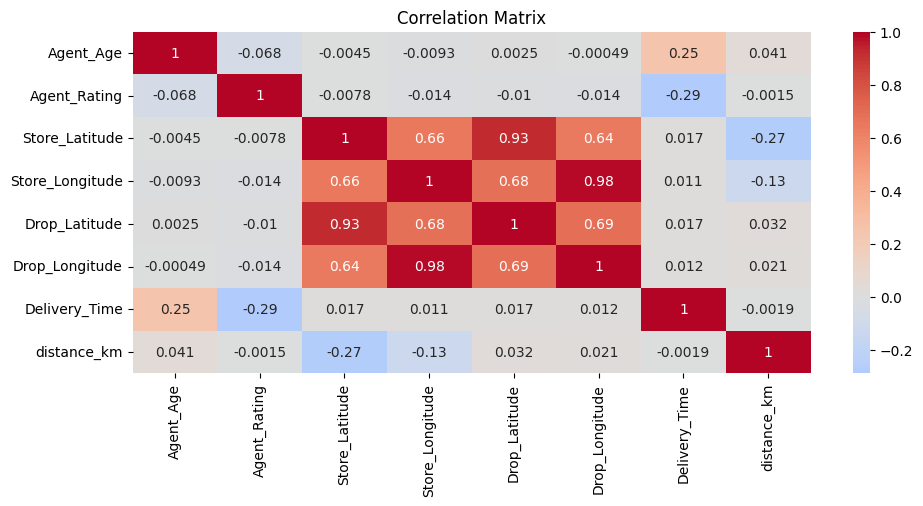

In [19]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.tight_layout()
plt.title("Correlation Matrix")
plt.show()

In [20]:
df.columns

Index(['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude',
       'Drop_Latitude', 'Drop_Longitude', 'Order_Date', 'Order_Time',
       'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area', 'Delivery_Time',
       'Category', 'distance_km'],
      dtype='object')

In [21]:
df['distance_km'].describe()

count    43739.000000
mean        38.561752
std        534.564299
min          1.465067
25%          4.663432
50%          9.220450
75%         13.682379
max      19692.674606
Name: distance_km, dtype: float64

In [22]:
df['distance_km'].value_counts()

distance_km
20.442930       328
14.152801       326
11.007735       323
6.290135        322
9.435202        321
               ... 
6871.396875       1
6754.425359       1
5669.319908       1
2.984566          1
17186.135481      1
Name: count, Length: 4548, dtype: int64

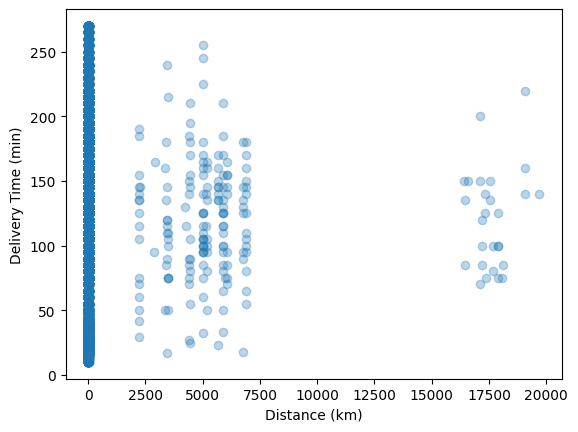

In [23]:
plt.scatter(df['distance_km'], df['Delivery_Time'], alpha=0.3)
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (min)")
plt.show()

In [24]:
print(df[['Store_Latitude','Store_Longitude','Drop_Latitude','Drop_Longitude']].describe())

       Store_Latitude  Store_Longitude  Drop_Latitude  Drop_Longitude
count    43739.000000     43739.000000   43739.000000    43739.000000
mean        17.210960        70.661177      17.459031       70.821842
std          7.764225        21.475005       7.342950       21.153148
min        -30.902872       -88.366217       0.010000        0.010000
25%         12.933298        73.170283      12.985996       73.280000
50%         18.551440        75.898497      18.633626       76.002574
75%         22.732225        78.045359      22.785049       78.104095
max         30.914057        88.433452      31.054057       88.563452


In [25]:
# Filter out invalid lat/lon (keep only India range)
df = df[(df['Store_Latitude'].between(8, 37)) & 
        (df['Drop_Latitude'].between(8, 37)) &
        (df['Store_Longitude'].between(68, 97)) & 
        (df['Drop_Longitude'].between(68, 97))]


In [26]:
df['distance_km'] = haversine(df['Store_Latitude'], df['Store_Longitude'],
                              df['Drop_Latitude'], df['Drop_Longitude'])


In [27]:
df = df.drop(columns=['Store_Latitude','Store_Longitude','Drop_Latitude','Drop_Longitude'])

In [28]:
print(df['distance_km'].describe())

count    40046.000000
mean         9.717187
std          5.598445
min          1.465067
25%          4.657655
50%          9.193021
75%         13.631447
max         20.969489
Name: distance_km, dtype: float64


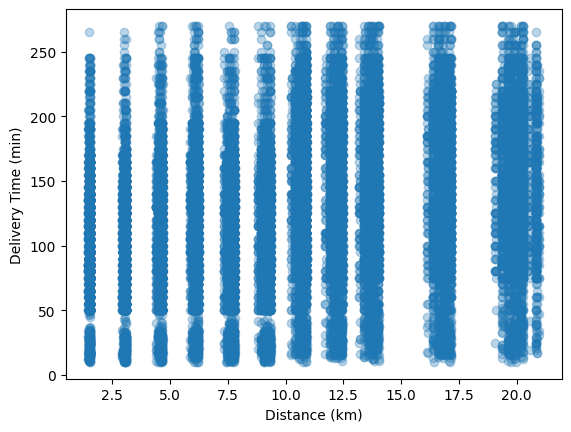

In [29]:
plt.scatter(df['distance_km'], df['Delivery_Time'], alpha=0.3)
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (min)")
plt.show()

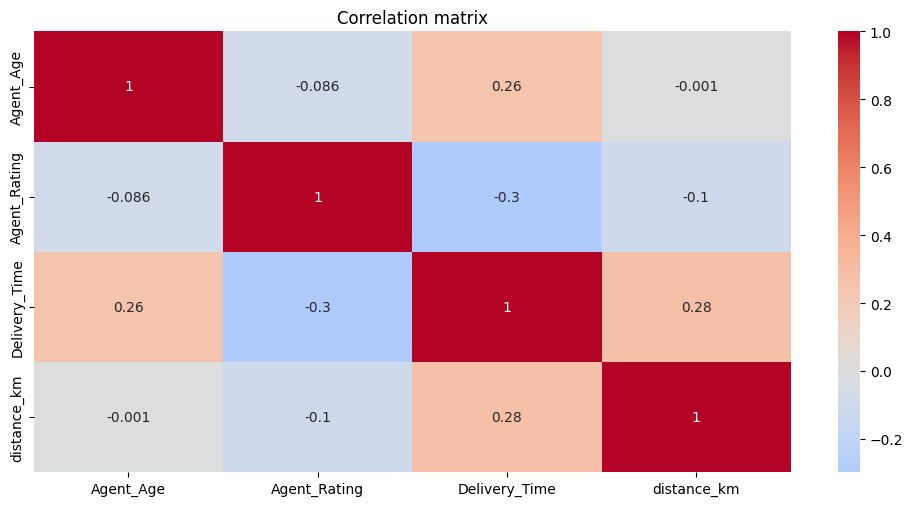

In [30]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.tight_layout()
plt.title("Correlation matrix")
plt.show()

In [31]:
print(df['distance_km'].describe())

count    40046.000000
mean         9.717187
std          5.598445
min          1.465067
25%          4.657655
50%          9.193021
75%         13.631447
max         20.969489
Name: distance_km, dtype: float64


In [32]:
df.columns

Index(['Agent_Age', 'Agent_Rating', 'Order_Date', 'Order_Time', 'Pickup_Time',
       'Weather', 'Traffic', 'Vehicle', 'Area', 'Delivery_Time', 'Category',
       'distance_km'],
      dtype='object')

In [33]:
# Check duplicate values
df.duplicated().sum().item()

0

In [34]:
df['Weather'].value_counts()

Weather
Fog           6784
Stormy        6757
Cloudy        6676
Sandstorms    6652
Windy         6624
Sunny         6504
Name: count, dtype: int64

In [35]:
df['Traffic'].unique()

array(['High ', 'Jam ', 'Low ', 'Medium ', 'NaN '], dtype=object)

In [36]:
df['Vehicle'].unique()

array(['motorcycle ', 'scooter ', 'van', 'bicycle '], dtype=object)

In [37]:
df['Area'].unique()

array(['Urban ', 'Metropolitian ', 'Other', 'Semi-Urban '], dtype=object)

In [38]:
df['Category'].unique()

array(['Clothing', 'Electronics', 'Sports', 'Cosmetics', 'Toys', 'Snacks',
       'Shoes', 'Apparel', 'Jewelry', 'Outdoors', 'Grocery', 'Books',
       'Kitchen', 'Pet Supplies', 'Skincare', 'Home'], dtype=object)

In [39]:
df['Traffic'] = df['Traffic'].replace('NaN ', np.nan)

In [40]:
df['Traffic'].isnull().sum()

np.int64(49)

In [41]:
df['Traffic'].unique()

array(['High ', 'Jam ', 'Low ', 'Medium ', nan], dtype=object)

In [42]:
df.isnull().sum()

Agent_Age         0
Agent_Rating     39
Order_Date        0
Order_Time        0
Pickup_Time       0
Weather          49
Traffic          49
Vehicle           0
Area              0
Delivery_Time     0
Category          0
distance_km       0
dtype: int64

In [43]:
df['Weather'].unique()

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy', nan],
      dtype=object)

In [44]:
# Handling missing values
df['Agent_Rating'] = df['Agent_Rating'].fillna(df['Agent_Rating'].median())

df['Weather'] = df['Weather'].fillna("Unknown")

df['Traffic'] = df['Traffic'].fillna("Unknown")

In [45]:
df.isnull().sum()

Agent_Age        0
Agent_Rating     0
Order_Date       0
Order_Time       0
Pickup_Time      0
Weather          0
Traffic          0
Vehicle          0
Area             0
Delivery_Time    0
Category         0
distance_km      0
dtype: int64

In [46]:
df['Agent_Rating'].value_counts()

Agent_Rating
4.8    6535
4.7    6533
4.9    6455
4.6    6359
5.0    3649
4.5    3053
4.2    1329
4.1    1320
4.3    1299
4.4    1243
4.0     994
3.5     236
3.8     215
3.7     202
3.6     193
3.9     174
3.4      31
3.1      28
3.2      26
1.0      25
6.0      24
3.3      23
2.7      21
2.6      20
2.5      18
2.9      18
2.8      17
3.0       6
Name: count, dtype: int64

In [47]:
# Removing rows which has rating above 5
df['Agent_Rating'] = df['Agent_Rating'].clip(lower=0, upper=5)

In [48]:
df.shape

(40046, 12)

In [49]:
df.columns

Index(['Agent_Age', 'Agent_Rating', 'Order_Date', 'Order_Time', 'Pickup_Time',
       'Weather', 'Traffic', 'Vehicle', 'Area', 'Delivery_Time', 'Category',
       'distance_km'],
      dtype='object')

In [50]:
df['Order_Time'] = df['Order_Time'].replace('NaN ', np.nan)

In [51]:
df.isnull().sum()

Agent_Age         0
Agent_Rating      0
Order_Date        0
Order_Time       49
Pickup_Time       0
Weather           0
Traffic           0
Vehicle           0
Area              0
Delivery_Time     0
Category          0
distance_km       0
dtype: int64

In [52]:
df['Pickup_Time'].unique()

array(['11:45:00', '19:50:00', '08:45:00', '18:10:00', '13:45:00',
       '21:30:00', '19:30:00', '17:30:00', '21:05:00', '22:10:00',
       '15:05:00', '17:40:00', '09:30:00', '20:05:00', '20:35:00',
       '15:10:00', '20:40:00', '20:50:00', '20:25:00', '22:45:00',
       '08:30:00', '19:45:00', '12:30:00', '18:50:00', '23:30:00',
       '21:35:00', '23:45:00', '22:50:00', '22:40:00', '23:35:00',
       '13:40:00', '19:10:00', '14:25:00', '11:10:00', '09:55:00',
       '08:55:00', '23:10:00', '19:25:00', '11:00:00', '21:45:00',
       '19:15:00', '16:55:00', '11:40:00', '15:15:00', '22:55:00',
       '20:55:00', '23:05:00', '18:00:00', '23:00:00', '09:40:00',
       '22:35:00', '22:00:00', '23:55:00', '15:40:00', '10:30:00',
       '21:00:00', '20:15:00', '12:15:00', '15:45:00', '00:05:00',
       '12:45:00', '21:15:00', '18:20:00', '18:25:00', '11:50:00',
       '12:50:00', '10:55:00', '21:40:00', '10:20:00', '17:55:00',
       '22:25:00', '23:50:00', '12:55:00', '00:10:00', '10:40:

In [53]:
# Dropping null values 
df =  df.dropna(subset=['Order_Time'])

In [77]:
# Handling date-time columns

df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df['Order_Time'] = pd.to_datetime(df['Order_Time'], format="%H:%M:%S", errors='coerce')
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'], errors='coerce')

In [78]:
# Extracting_useful_columns from it

df['order_dayofweek'] = df['Order_Date'].dt.dayofweek
df['order_month'] = df['Order_Date'].dt.month
df['is_weekend'] = df['order_dayofweek'].isin([5,6]).astype(int)

In [79]:
df.head()

,Agent_Age,Agent_Rating,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,distance_km,order_dayofweek,order_month,is_weekend,order_hour,is_rush_hour
0,37,4.9,2022-03-19,1900-01-01 11:30:00,2025-10-03 11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.025149,5,3,1,11,0
1,34,4.5,2022-03-25,1900-01-01 19:45:00,2025-10-03 19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530,4,3,0,19,1
2,23,4.4,2022-03-19,1900-01-01 08:30:00,2025-10-03 08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.552758,5,3,1,8,1
3,38,4.7,2022-04-05,1900-01-01 18:00:00,2025-10-03 18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.790401,1,4,0,18,1
4,32,4.6,2022-03-26,1900-01-01 13:30:00,2025-10-03 13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,6.210138,5,3,1,13,0


In [80]:
df['order_hour'] = df['Order_Time'].dt.hour
df['is_rush_hour'] = df['order_hour'].between(8,10) | df['order_hour'].between(18,21)
df['is_rush_hour'] = df['is_rush_hour'].astype(int)

In [87]:
# Combine Order_Date + Order_Time into one datetime first
df['order_datetime'] = pd.to_datetime(df['Order_Date'].astype(str) + ' ' + df['Order_Time'].astype(str), errors='coerce')

C:\Users\Deepam Shah\AppData\Local\Temp\ipykernel_59564\2604040300.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_datetime'] = pd.to_datetime(df['Order_Date'].astype(str) + ' ' + df['Order_Time'].astype(str), errors='coerce')


In [88]:
df.head()

,Agent_Age,Agent_Rating,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,distance_km,order_dayofweek,order_month,is_weekend,order_hour,is_rush_hour,pickup_hour,order_datetime
0,37,4.9,2022-03-19,1900-01-01 11:30:00,2025-10-03 11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.025149,5,3,1,11,0,11,2022-03-19 11:30:00-01:00
1,34,4.5,2022-03-25,1900-01-01 19:45:00,2025-10-03 19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530,4,3,0,19,1,19,2022-03-25 19:45:00-01:00
2,23,4.4,2022-03-19,1900-01-01 08:30:00,2025-10-03 08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.552758,5,3,1,8,1,8,2022-03-19 08:30:00-01:00
3,38,4.7,2022-04-05,1900-01-01 18:00:00,2025-10-03 18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.790401,1,4,0,18,1,18,2022-04-05 18:00:00-01:00
4,32,4.6,2022-03-26,1900-01-01 13:30:00,2025-10-03 13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,6.210138,5,3,1,13,0,13,2022-03-26 13:30:00-01:00


In [89]:
df.columns

Index(['Agent_Age', 'Agent_Rating', 'Order_Date', 'Order_Time', 'Pickup_Time',
       'Weather', 'Traffic', 'Vehicle', 'Area', 'Delivery_Time', 'Category',
       'distance_km', 'order_dayofweek', 'order_month', 'is_weekend',
       'order_hour', 'is_rush_hour', 'pickup_hour', 'order_datetime'],
      dtype='object')

In [90]:
df = df.drop(columns=['Order_Date','Order_Time','Pickup_Time','order_datetime', 'pickup_hour'])

In [91]:
df.columns

Index(['Agent_Age', 'Agent_Rating', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category', 'distance_km', 'order_dayofweek',
       'order_month', 'is_weekend', 'order_hour', 'is_rush_hour'],
      dtype='object')

In [93]:
# Saving the cleaned data (without the index column)
df.to_csv("cleaned_amazon_delivery.csv", index=False)